# Learning TensorFlow form a very beginning
I create a very simple model in order to learn how to use TensorFlow (tf) with a low level API.


In [1]:
import numpy as np
import tensorflow as tf


/Users/taku/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## 1 Basics
The process of tf can be divided into 3 parts:
- Data preparation
- Definition of operations (generate Graph)
- Running operations (run Graph)


In [2]:
# 1: data preparation
a_raw = 3.0
b_raw = 4.0

# 2: definition of operations
a = tf.constant(a_raw)
b = tf.constant(b_raw)
total = a + b

# 3: runing operations
session = tf.Session()
print(session.run([a,b])) # run constant function
print(session.run(total))


[3.0, 4.0]
7.0


## 2 Feed data afterward
In general, data will be feeded iteratively in ML. Thus we here just define data as a 'bucket'. For this purpose, we can use `placeholder`.

In [3]:
# 1: data preparation
# NOTHING

# 2: definition of operations
x1 = tf.placeholder(tf.float32) 
x2 = tf.placeholder(tf.float32)
addition = tf.add(x1, x2)

# 3: runing operations
session = tf.Session()
print(session.run(addition, feed_dict = {x1: 5.9, x2: 2.2}))
print(session.run(addition, feed_dict = {x1: [3.0, 1.0], x2: [4.0, 2.0]}))


8.1
[7. 3.]


## 3 Implement simple linear regression model

Here we create a simple linear regression model with tf. First we see the model without any training.

In [4]:
# 1: data preparation
x_data = np.linspace(1.0, 3.0, num=10) # data
y_data = x_data * 2.0 - 1.0  # true labels

# 2: definition of operations
x = tf.placeholder(tf.float32) 
y_label = tf.placeholder(tf.float32) # true labels
w = tf.Variable(1.0)  # initial weight -> 1.0
b = tf.Variable(0.0)  # initial bias -> 0.0
def linear_model(input_data):
    return input_data * w + b

y_pred = linear_model(x)  # model

# to initialize all variables 
init = tf.global_variables_initializer()

# # 3: runing operations
session = tf.Session()
session.run(init) # run initialization step
for i in range(len(x_data)):
    print(session.run(y_pred, feed_dict = {x: x_data[i], y_label: y_data[i]}))

1.0
1.2222222
1.4444444
1.6666666
1.8888888
2.1111112
2.3333333
2.5555556
2.7777777
3.0


We then try to train the model. We need to define **loss** of the model. We adopt **Mean squared error** which is defined as the mean of the L2 norm from the true label of every data entry. For optimizer, we use **gradient descent** which takes the direction of the gradient of the loss so as to minimize it. Our model is as follows:
$$ y = w \cdot x + b$$
where $x$ is an input, $w$ is a **weight**, $b$ is a **bias** and $y$ is an output (label).

In [5]:
# 1: data preparation
x_data = np.linspace(1.0, 3.0, num=10) # data
y_data = x_data * 2.0 - 1.0  # true labels

# 2: definition of operations
x = tf.placeholder(tf.float32) 
y_label = tf.placeholder(tf.float32) # true labels
w = tf.Variable(1.0)  # initial weight -> 1.0
b = tf.Variable(0.0)  # initial bias -> 0.0

def linear_model(input_data):
    """simple linear model with an input value"""
    return input_data * w + b

y_pred = linear_model(x)  # model

# define loss
loss = tf.losses.mean_squared_error(labels=y_label, predictions=y_pred)
# define train with GD
train = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

# to initialize all variables 
init = tf.global_variables_initializer()

# # 3: runing operations
session = tf.Session()
session.run(init) # run initialization step
for i in range(2001):
    session.run(train, feed_dict= {x: x_data, y_label: y_data})
    if i % 100 == 0:
        current_loss = session.run(loss, feed_dict= {x: x_data, y_label: y_data})
        print('Iteration: ', i, ' loss: ', current_loss)

Iteration:  0  loss:  1.1500523
Iteration:  100  loss:  0.09882148
Iteration:  200  loss:  0.072776295
Iteration:  300  loss:  0.053595543
Iteration:  400  loss:  0.039470047
Iteration:  500  loss:  0.029067418
Iteration:  600  loss:  0.021406507
Iteration:  700  loss:  0.015764628
Iteration:  800  loss:  0.011609776
Iteration:  900  loss:  0.008549908
Iteration:  1000  loss:  0.0062964954
Iteration:  1100  loss:  0.0046370216
Iteration:  1200  loss:  0.003414899
Iteration:  1300  loss:  0.0025148746
Iteration:  1400  loss:  0.001852053
Iteration:  1500  loss:  0.0013639372
Iteration:  1600  loss:  0.0010044759
Iteration:  1700  loss:  0.0007397323
Iteration:  1800  loss:  0.0005447654
Iteration:  1900  loss:  0.00040118716
Iteration:  2000  loss:  0.00029545027


Let's visualize the resulting prediction

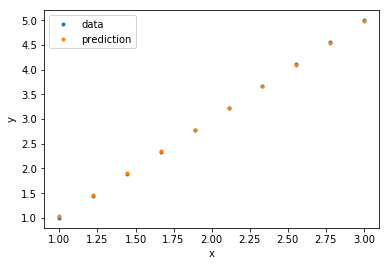

In [6]:
import matplotlib.pyplot as plt

# obtain the final prediction
y_result = session.run(y_pred, feed_dict= {x: x_data, y_label: y_data})

# plot
plt.plot(x_data,y_data,'.', label='data')
plt.plot(x_data,y_result ,'.', label='prediction')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()
        

## 4 Implement neural network
We now try to implement a simple neural network (NN) model to predict a sine curve:
$$ y = \sin(x)$$
where we consider $x \in [0, 3\pi]$.  We apply a three-layer NN with **tanh** activation function.



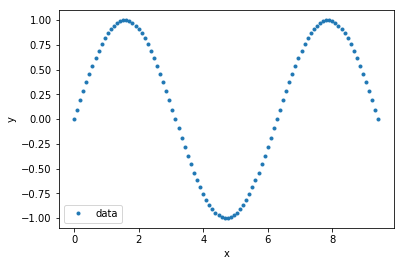

In [7]:
# 1: data preparation
x_data = np.linspace(0, 3*np.pi, num=100)[:,None] # data
y_data = np.sin(x_data) # true labels

plt.plot(x_data,y_data,'.', label='data')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

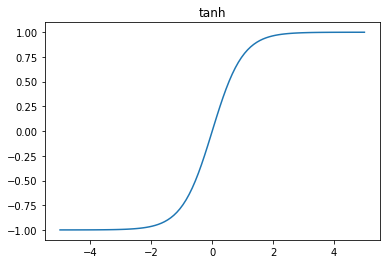

In [8]:
# tanh function
xax = np.linspace(-5,5,100)
plt.plot(xax,np.tanh(xax))
plt.title('tanh')
plt.show()

Iteration:  0  loss:  0.49086928
Iteration:  1000  loss:  0.019730764
Iteration:  2000  loss:  0.0015781209
Iteration:  3000  loss:  0.0007899654
Iteration:  4000  loss:  0.00072687597
Iteration:  5000  loss:  0.0003728614
Iteration:  6000  loss:  0.00016435959
Iteration:  7000  loss:  0.00016003616
Iteration:  8000  loss:  8.580062e-05
Iteration:  9000  loss:  0.00010011528
Iteration:  10000  loss:  5.8034784e-05
Iteration:  11000  loss:  7.66266e-05
Iteration:  12000  loss:  0.00010122388
Iteration:  13000  loss:  0.00014506512
Iteration:  14000  loss:  3.8384664e-05
Iteration:  15000  loss:  3.5662502e-05
Iteration:  16000  loss:  3.2690885e-05
Iteration:  17000  loss:  0.0005031883
Iteration:  18000  loss:  2.814668e-05
Iteration:  19000  loss:  2.6964908e-05
Iteration:  20000  loss:  2.464424e-05


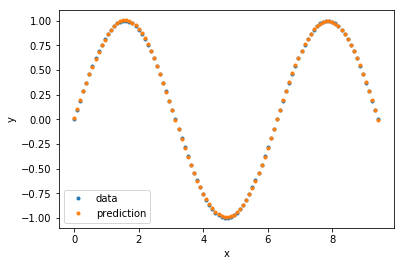

In [9]:
num_hidden = 10
ini_stddev = 0.1

# 2: definition of operations
x = tf.placeholder(tf.float32, (None, 1))
y_label = tf.placeholder(tf.float32)

# modeling of NN
weight1 = tf.Variable(tf.truncated_normal(shape=(1, num_hidden),mean=0.0,stddev=ini_stddev))
bias1 = tf.Variable(tf.zeros([num_hidden]))
hidden1 = tf.nn.tanh(tf.matmul(x, weight1) + bias1)

weight2 = tf.Variable(tf.truncated_normal(shape=(num_hidden,num_hidden),mean=0.0,stddev=ini_stddev))
bias2 = tf.Variable(tf.zeros([num_hidden]))
hidden2 = tf.nn.tanh(tf.matmul(hidden1, weight2) + bias2)

weight3 = tf.Variable(tf.truncated_normal(shape=(num_hidden,num_hidden),mean=0.0,stddev=ini_stddev))
bias3 = tf.Variable(tf.zeros([num_hidden]))
hidden3 = tf.nn.tanh(tf.matmul(hidden2, weight3) + bias3)

weight4 = tf.Variable(tf.truncated_normal(shape=(num_hidden,1),mean=0.0,stddev=ini_stddev))
bias4 = tf.Variable(tf.zeros([1]))
y_pred = tf.matmul(hidden3, weight4) + bias4 # prediction

loss = tf.losses.mean_squared_error(labels=y_label, predictions=y_pred) # define loss
train = tf.train.AdamOptimizer().minimize(loss)

init = tf.global_variables_initializer()


# 3: runing operations
session = tf.Session()
session.run(init) # run initialization step
for i in range(20001):
    session.run(train, feed_dict= {x: x_data, y_label: y_data})
    if i % 1000 == 0:
        current_loss = session.run(loss, feed_dict= {x: x_data, y_label: y_data})
        print('Iteration: ', i, ' loss: ', current_loss)

y_result = session.run(y_pred, feed_dict={x: x_data, y_label: y_data})
plt.plot(x_data,y_data,'.', label='data')
plt.plot(x_data,y_result,'.', label='prediction')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()